In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1: Temperature Analysis

Generate hourly temperature data for one week using NumPy.
1. Store it in a Pandas DataFrame with datetime index.
2. Plot the temperature trend over the week using a line chart.




In [ ]:
hours = pd.date_range(start='2025-01-01', periods=168, freq='H')
temp = np.random.normal(loc=22, scale=5, size=168).astype(int)

df=pd.DataFrame(temp)
df.head()
# 

plt.plot(np.arange(len(df)), df, marker='o', mfc='red')
plt.title("Temperature Graph")
plt.xlabel("Hours-->")
plt.ylabel("Temp(in C)-->")
plt.tight_layout()
plt.show()

C:\Users\HIMANSHU\AppData\Local\Temp\ipykernel_59148\2745055814.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hours = pd.date_range(start='2025-01-01', periods=168, freq='H')


,0
0,18
1,22
2,25
3,29
4,33


# Question 2: 

Random Sales Dataset
Simulate sales data for 5 products over 30 days:
Columns: "date", "product", "units_sold", "unit_price".
1. Compute total revenue per product.
2. Plot a bar chart of revenue by product.




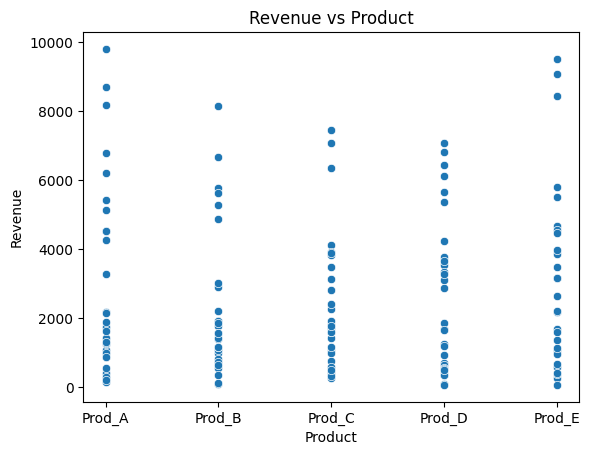

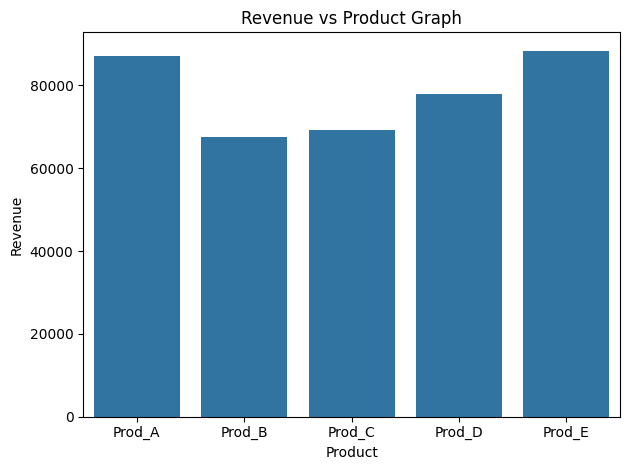

In [52]:
dates=pd.date_range(start='2025-01-01', periods=30, freq='D')
prods=['Prod_A', 'Prod_B', 'Prod_C', 'Prod_D', 'Prod_E']
data=[]
for date in dates:
    for prod in prods:
        units_sold = np.random.randint(1, 101)
        unit_price = np.round(np.random.uniform(10,100),2)
        data.append([date, prod, units_sold, unit_price])
        
df = pd.DataFrame(data, columns=['date', 'product', 'units_sold', 'unit_price'])

df['rev'] = df['units_sold']*df['unit_price']
sns.scatterplot(x='product', y='rev', data=df)
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue vs Product")
plt.show()


df_total=df.copy()
df_total['rev'] = df_total['units_sold']*df_total['unit_price']
rev_df = df_total.groupby('product', as_index=False)['rev'].sum()
rev_df

sns.barplot(x='product', y='rev', data=rev_df)
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue vs Product Graph")
plt.tight_layout()
plt.show()

# Question 3:
Missing Data Handling
Create a DataFrame with some missing values:
1. Fill missing numeric values with the mean.
2. Fill missing categorical values with mode.
3. Plot before vs after comparison using boxplots.


In [53]:
data={
    'Name': ['Alice', 'Charles','Bob','Dan', 'Fred'],
    'Age': [25, np.nan, 30,22,np.nan],
    'City': ['Agra','Bombay','Chennai', 'Delhi', 'Kolkata'],
    'Score': [85, 90, np.nan, 88, 92]
}

df = pd.DataFrame(data)

mean_df = df.fillna(np.round(df.mean(numeric_only=True), 2))

mode_df = df.fillna(df.mode(numeric_only=True).iloc[0])


# Question 4: Customer Segmentation

Simulate a customer dataset with features like "age", "income", "spending_score".
1. Use quantile-based binning to categorize customers into Low, Medium, High spenders.
2. Visualize age vs income, colored by spending category (scatter plot).


[]

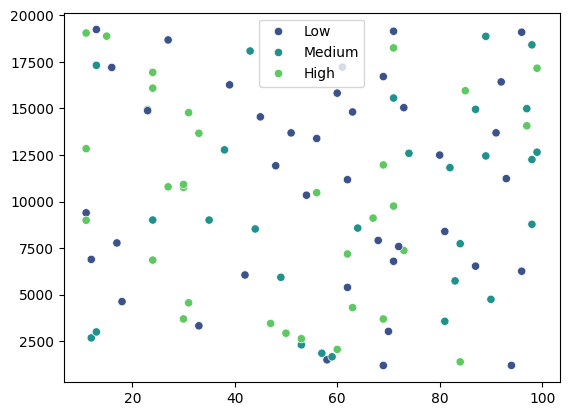

In [54]:
np.random.seed(42)
age = np.random.randint(10, 100, size=100)
income = np.random.randint(1000,20000, size=100)
spending_score = np.random.randint(0,10, size=100)

df = pd.DataFrame({'age': age, 'income': income, 'spending_score': spending_score})
df.head()


df['spending_score'] = pd.qcut(df['spending_score'], q=3, labels=['Low', 'Medium', 'High'])
df
sns.scatterplot(x=age, y=income, data=df, hue='spending_score', palette='viridis')
plt.legend(loc=0)
plt.plot()

# Question 5: Time Series Resampling
Generate minute-level stock price data for a day.
Resample it to hourly average prices using Pandas.


Plot both the original and resampled series.


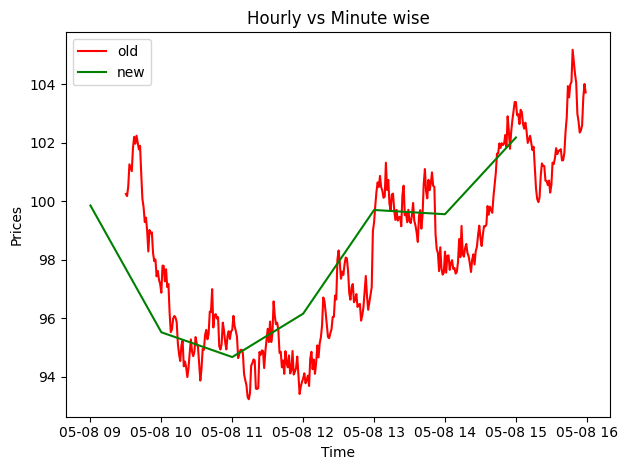

In [55]:
np.random.seed(42)

time_index=pd.date_range(start="09:30", periods=390, freq='min')
start_price = 100
price_change = np.random.normal(loc=0, scale=0.5, size=390)
prices = start_price+np.cumsum(price_change)
df=pd.DataFrame({
    'time': time_index,
    'price': prices
})

df.set_index('time', inplace=True)
new_df = df.resample('h').mean()

plt.plot(df, label='old', color='red')
plt.plot(new_df, label='new', color='green')
plt.legend()
plt.title("Hourly vs Minute wise")
plt.xlabel('Time')
plt.ylabel('Prices')
plt.tight_layout()
plt.show()

# Question 6: . Outlier Detection
Create a dataset of test scores with intentional outliers.
1. Detect outliers using IQR method.
2. Remove them and plot before/after distributions side-by-side.

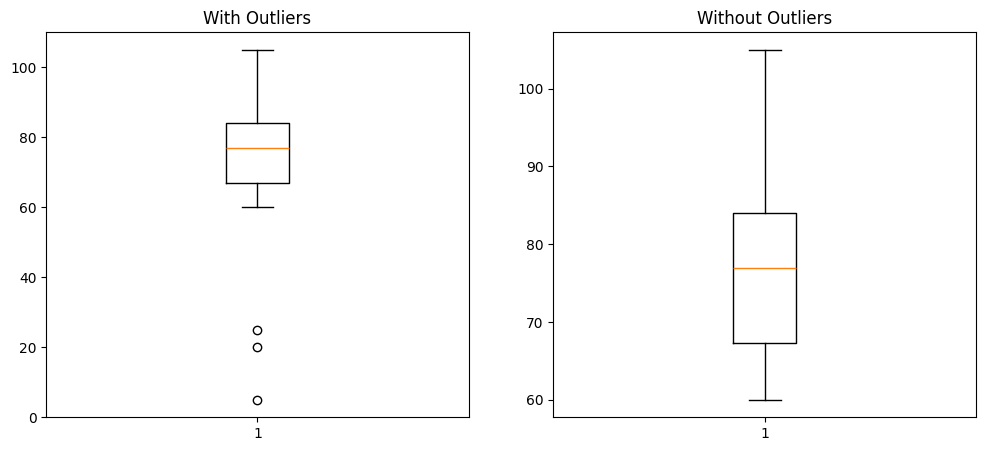

In [70]:
np.random.seed(42)
marks=np.random.randint(60,90,100)
outliers=[20,25,100,105,5]
all_scores=np.concatenate((marks, outliers))

df=pd.DataFrame({'marks': all_scores})

Q1 = df['marks'].quantile(0.25)
Q3 = df['marks'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

new_df=df[(df['marks']>=lower_bound) & (df['marks']<=upper_bound)]
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.boxplot(df['marks'])
plt.title("With Outliers")

plt.subplot(1,2,2)
plt.boxplot(new_df['marks'])
plt.title("Without Outliers")
plt.show()

# Question 7:
Correlation Matrix
Simulate a dataset with multiple continuous variables.
1. Compute the correlation matrix.
2. Plot a heatmap of correlations using Seaborn.


    age        income  spending_score      credit
0    56  56363.051083       34.342056  694.226330
1    46  40932.793314       61.784677  741.585429
2    32  54760.425874       75.007284  684.032246
3    60  63036.612684       62.286313  689.769175
4    25  52115.870123       50.979041  713.553087
..  ...           ...             ...         ...
95   24  58733.169691       51.325846  722.922065
96   26  52056.501340       57.964239  709.310617
97   41  35565.166483       48.097425  741.309524
98   18  39722.891359       54.473250  766.325194
99   61  57412.406350       62.358028  652.280494

[100 rows x 4 columns]

                     age    income  spending_score    credit
age             1.000000  0.025179        0.181517 -0.017173
income          0.025179  1.000000        0.030640 -0.024427
spending_score  0.181517  0.030640        1.000000  0.124970
credit         -0.017173 -0.024427        0.124970  1.000000


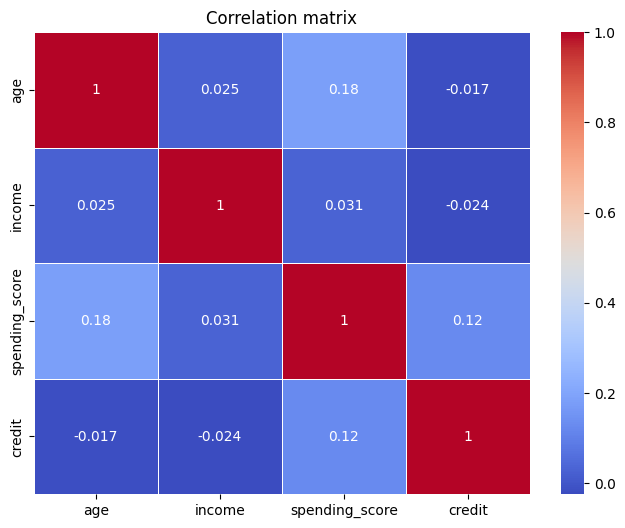

In [73]:
np.random.seed(42)
data={
    'age': np.random.randint(18,65,100),
    'income': np.random.normal(50000, 10000, 100),
    'spending_score': np.random.normal(60,15, 100),
    'credit': np.random.normal(700, 50, 100)
}

df = pd.DataFrame(data)
corr = df.corr()
print(df)
print()
print(corr)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', lw=0.5)
plt.title("Correlation matrix")
plt.show()

Question 8: Multi-Index DataFrame
Simulate sales data with multi-level index (store, date).
1. Compute total and average sales per store.
2. Visualize store-wise sales using stacked bar chart.


In [ ]:
sales={
    
}

# Question 9: Crosstab Analysis
Create a dataset of customer purchases:
Columns: "gender", "age_group", "product_category", "purchase_amount".
1. Generate a crosstab of gender vs product category.
2. Visualize with a grouped bar chart.

   gender purchased
0    Male       Yes
1  Female        No
2  Female       Yes
3    Male       Yes
4  Female        No
5    Male        No
purchased  No  Yes
gender            
Female      2    1
Male        1    2


<Axes: xlabel='gender'>

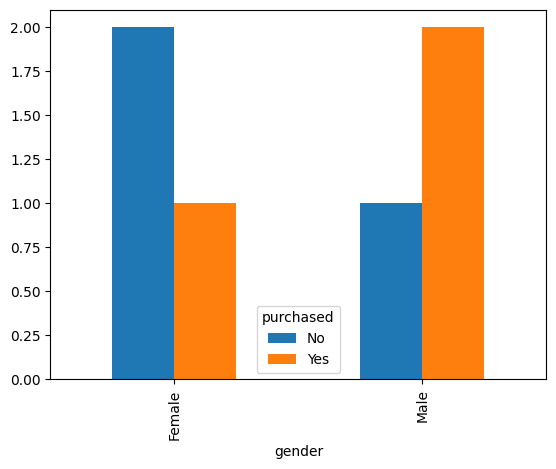

In [80]:
data={
    'gender': ['Male', 'Female','Female', 'Male', 'Female', 'Male'],
    'purchased': ['Yes', 'No', 'Yes', 'Yes', 'No', 'No']
}

df=pd.DataFrame(data)
print(df)
res=pd.crosstab(df['gender'], df['purchased'])
print(res)

# plt.box(df['gender'], df['purchased'])
res.plot(kind='bar', width=0.5)

# Question 10. Rolling Averages
Simulate website traffic data (visits per day for 100 days).
1. Compute 7-day and 30-day rolling averages.
2. Plot all three (original, 7-day, 30-day) on the same chart.

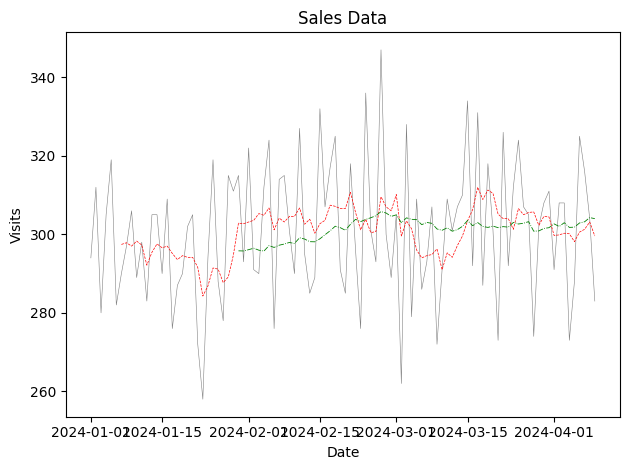

In [85]:
np.random.seed(42)

dates=pd.date_range(start='2024-01-01', periods=100, freq='D')
visits=np.random.poisson(lam=300, size=100)
df=pd.DataFrame({
    'date': dates,
    'visits': visits
})

df.set_index('date', inplace=True)
df_7_days = df['visits'].rolling(window=7).mean()
df_30_days= df['visits'].rolling(window=30).mean()

plt.plot(df.index, df['visits'], label='original', color='gray', lw=0.4)
plt.plot(df.index, df_7_days, label="7 Day Mean", color='red', lw=0.5, ls='--')
plt.plot(df.index, df_30_days, label='30 Day Mean', color='green', lw=0.6, ls='-.')

plt.xlabel("Date")
plt.ylabel("Visits")
plt.title("Sales Data")
plt.tight_layout()
plt.show()